<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2023/blob/main/Tutorial_12_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 12: The Digits Dataset
### Dr. Daugherity, PHYS 453 

The digits dataset in sklearn is a sample of a [more complete dataset](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits).  Ours has 1,797 examples of classified hand-written digits 0-9 stored as pixel arrays with color from 0 (white) to 15 (black).

How well can our classifiers recognize digits?  The only fair way to evaluate classifier performance is to test them with data they haven't been trained where you know the right answers.  So we will using a **test / train split** as illustrated below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.datasets import load_digits  
from sklearn.metrics import ConfusionMatrixDisplay

We will load in the 1,797 samples from the data set and then split them (crudely):
* the first 1,697 will be used for training
* the last 100 will not be trained on and will only be used for testing the classifier's performance

Sklearn has a `train_test_split` function to do this automatically:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
but I'll just do it by hand today.

In [2]:
X,y = load_digits(return_X_y=True)

# Do a crude test/train split to evaluate classifiers
NUM_TEST = 100
X_train = X[:-NUM_TEST] # take all but the last 100 elements, use these for training
y_train = y[:-NUM_TEST]
X_test = X[-NUM_TEST:]  # take only the last 100 elements, use these for testing
y_test = y[-NUM_TEST:]  # the right answers to check classifier's performance

print("Data:  ",X.shape,y.shape)
print("Train: ",X_train.shape, y_train.shape)
print("Test:  ",X_test.shape,y_test.shape)

Data:   (1797, 64) (1797,)
Train:  (1697, 64) (1697,)
Test:   (100, 64) (100,)


In [3]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

We have 64 features each representing a pixel color from 0 (white) to 15 (black).  

### VERY IMPORTANT WARNING
* To draw the images we need to make a 2D 8x8 array
* To use sklearn we need a 2D Nx64 array (for N samples)

We will use the reshape command to accomplish this feat:  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html  
In giving the new shape, you can use one -1 and numpy will calculate the dimension from the number of elements

In [4]:
X_train[0].shape

(64,)

So one sample is a 1D array with 64 elements, so we need to reshape it

In [5]:
X_train[0].reshape(8,8)  # make an 8x8 array for drawing

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
X_train[0].reshape(8,8).shape

(8, 8)

In [7]:
X_train[0].reshape(1,-1)  # make a 2D 1x64 array for sklearn  (-1 means to use all elements)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
X_train[0].reshape(1,-1).shape

(1, 64)

**DO NOT PROCEED FARTHER** until you understand this.  

Now we can play with digits

# Drawing Digits

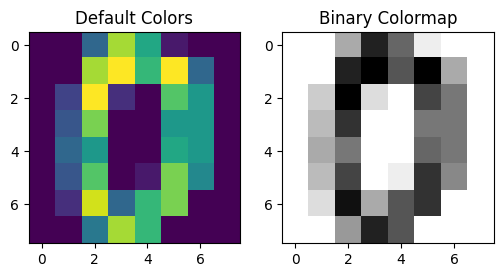

In [9]:
# Plot the first training sample
plt.figure(figsize=(6, 3))

plt.subplot(1,2,1)
plt.imshow(X_train[0].reshape(8,8)) 
plt.title("Default Colors")

plt.subplot(1,2,2)
plt.title("Binary Colormap")
plt.imshow(X_train[0].reshape(8,8), cmap=plt.cm.binary)

plt.show()

The `imshow` command draws the 8x8 image.  The default colors are quite pretty, but I'll stick with the black and white version

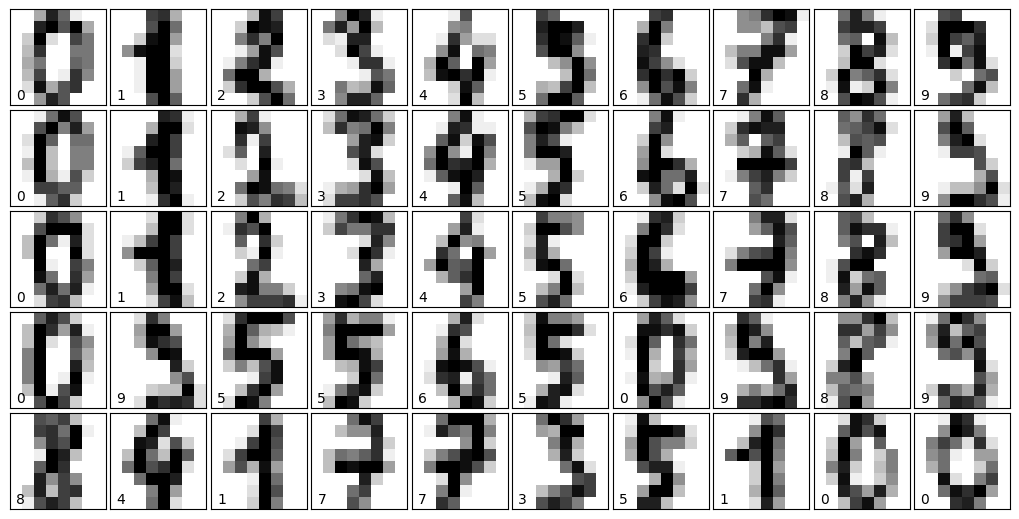

In [10]:
# Plot the first 50 samples
fig = plt.figure(figsize=(10, 5))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # make small panels

for i in range(50):
    ax = fig.add_subplot(5,10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(8,8), cmap=plt.cm.binary)
    ax.text(0, 7, str(y_train[i]))  # label the image with the target value
    
plt.show()

In [11]:
y_train[:50] # the true numbers in the training set

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [12]:
target,count = np.unique(y_train, return_counts=1)
print("Target\tCount")
for t,c in zip(target,count):
    print(t,'\t',c)

Target	Count
0 	 168
1 	 172
2 	 167
3 	 173
4 	 171
5 	 172
6 	 171
7 	 169
8 	 164
9 	 170


We have nearly equal numbers of all the digits in the training set

Let's try training a classifier and seeing if it works

# Classifier Performance
### The Training Data

In [13]:
clf = naive_bayes.GaussianNB()
clf.fit(X_train,y_train)  # only train on the training data!!!!!!!!!!!
clf.score(X_train,y_train)

0.8573954036535062

The gaussian fits get 85.7% of the training data right.  Where did it go wrong?

### The Test Data
The only fair way to evaluate a classifier is to use data **it hasn't been trained on**.  That's why we reserved 100 samples for a testing data set.  How well do we do with new samples the classifiers hasn't seen before?

In [14]:
clf.score(X_test,y_test)

0.87

We get 87% right!  Consistent scores between the test and train dataset are a good sign that we are not under or over fitting.

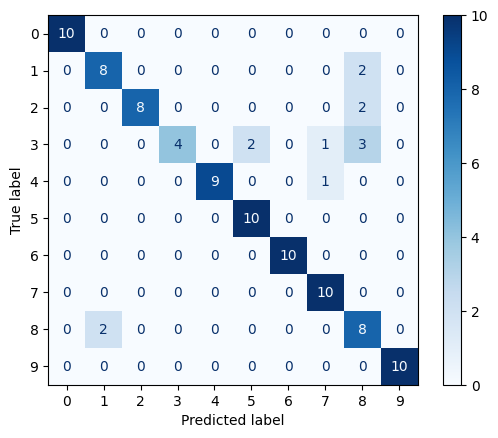

In [15]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap='Blues')
plt.show()

We get a nice visualization of our mistakes. We often confuse 3's as 5's or 8's. So if I were going to try to improve performance then those are the places I would start.

In [16]:
# Find the miss-classified samples
miss = []  # save missed sample numbers
print('Sample\tTruth\tPredicted')
for i,pred in enumerate(y_pred):
    if pred!=y_test[i]:
        print(f"{i}\t{y_test[i]}\t{pred}")
        miss.append(i)

Sample	Truth	Predicted
11	4	7
15	3	7
20	2	8
29	3	8
30	3	8
32	3	5
33	3	8
50	1	8
54	2	8
60	1	8
68	3	5
93	8	1
97	8	1


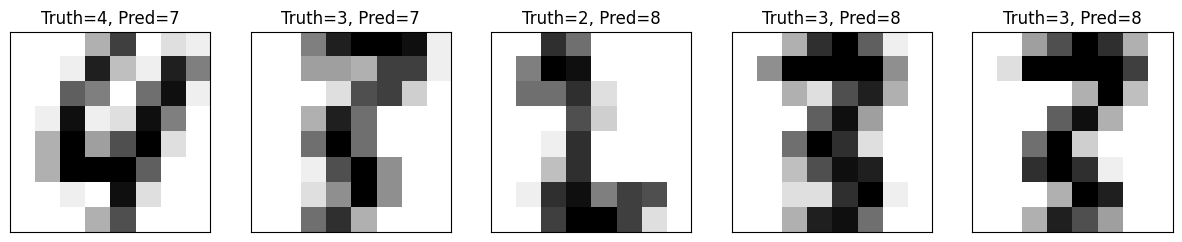

In [17]:
# Plot the first 5 missed samples
fig = plt.figure(figsize=(15, 3))  
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) # make small panels

for i in range(5):
    m = miss[i]  # the sample number we are looking at
    ax = fig.add_subplot(1,5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[m].reshape(8,8), cmap=plt.cm.binary)
    plt.title(f"Truth={y_test[m]}, Pred={y_pred[m]}")
    
plt.show()

Some of these are reasonable guesses, but some are pretty strange.

In Homework 4 you will try to do better!